## Introduction
In the world of Analytics, the best way to get insights is by visualizing the data. Data can be visualized by representing it as plots which is easy to understand, explore and grasp. Such data helps in drawing the attention of key elements.

To analyse a set of data using Python, we make use of Matplotlib, a widely implemented 2D plotting library. Likewise, Seaborn is a visualization library in Python.

<a id = "features"></a>
## 1. Important Features of Seaborn
Seaborn is built on top of Python’s core visualization library Matplotlib. It is meant to serve as a complement, and not a replacement. However, Seaborn comes with some very important features. Let us see a few of them here. The features help in -
* Built in themes for styling m atplotlib graphics
* Visualizing univariate and bivariate data
* Fitting in and visualizing linear regression models
* Plotting statistical time series data
* Seaborn works well with NumPy and Pandas data structures
* It comes with built in themes for styling Matplotlib graphics

In most cases, you will still use Matplotlib for simple plotting. The knowledge of Matplotlib is recommended to tweak Seaborn’s default plots.

Let's get stated by import of all required library.

In [10]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import the Data
Let's extract the our **Titanic data** from the .csv file, create a  pandas DataFrame and look at the available indicators:

- ***Survived***: Outcome of survival (0 = No; 1 = Yes)
- ***Pclass***: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- ***Name***: Name of passenger
- ***Sex***: Sex of the passenger
- ***Age***: Age of the passenger (Some entries contain NaN)
- ***SibSp***: Number of siblings and spouses of the passenger aboard
- ***Parch***: Number of parents and children of the passenger aboard
- ***Ticket***: Ticket number of the passenger
- ***Fare***: Fare paid by the passenger
- ***Cabin***: Cabin number of the passenger (Some entries contain NaN)
- ***Embarked***: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

In [6]:
titanic=pd.read_csv('titanic.csv')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [27]:
titanic.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

### Distribution plots
Distribution of data is the foremost thing that we need to understand while analysing the data. Here, we will see how seaborn helps us in understanding the distribution of our data.


### distplot
The `distplot()` function provides the most convenient way to take a quick look at univariate distribution. This function will plot a `histogram` that fits the **kernel density estimation(KDE)** of the data.

Now let's plot the histogram of **Number of parents and children of the passenger aboard(parch)**.


In [11]:
sns.distplot(titanic['Parch'],kde=False)
plt.show()

As we can see, most passengers don't have neither parents nor children aboard.

### kdeplot
***Kernel Density Estimation (KDE)*** is a way to estimate the probability density function of a continuous random variable. It is used for ***non-parametric*** analysis. Setting the `hist` flag to False in `distplot` will yield the KDE plot. For bivariate distribution, we can plot a kde by using `jointplot()`. Pass value `‘kde’` to the parameter `kind` to plot kernel plot.

**Note:** `distplot(data)` is used to visualize the ***parametric distribution*** of data. It plot both KDE and histogram on the same figure. 

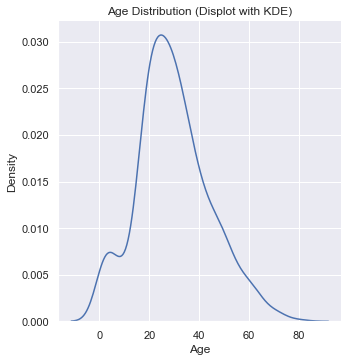

In [42]:
sns.displot(titanic, x='Age', kind='kde')
plt.title("Age Distribution (Displot with KDE)")
plt.show()

In [39]:
sns.displot(titanic, x='Age')
plt.title("Age Distribution (Displot without KDE)")
plt.show()


### scatterplot
**Scatter plot** is the most convenient way to visualize the distribution where each observation is represented in two -dimensional plot via x and y axis.

In [15]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Age", y="Fare", hue="Sex", data=titanic)
plt.show()

<a id = "lineplot"></a>
### 3.3. lineplot
Draw a line plot with possibility of several semantic groupings.

The relationship between `x` and `y` can be shown for different subsets of the data using the `hue, size`, and `style` parameters. These parameters control what visual semantics are used to identify the different subsets. It is possible to show up to three dimensions independently by using all three semantic types, but this style of plot can be hard to interpret and is often ineffective. Using redundant semantics (i.e. both **hue** and **style** for the same variable) can be helpful for making graphics more accessible.

The default treatment of the hue (and to a lesser extent, size) semantic, if present, depends on whether the variable is inferred to represent **“numeric” or “categorical”** data. In particular, numeric variables are represented with a sequential colormap by default, and the legend entries show regular **“ticks”** with values that may or may not exist in the data. This behavior can be controlled through various parameters.

By default, the plot aggregates over multiple `y` values at each value of `x` and shows an estimate of the central tendency and a confidence interval for that estimate.


In [17]:
plt.figure(figsize=(8,8))
sns.lineplot(x="Age", y="Fare", hue="Sex", style="Sex", data=titanic)
plt.show()

### Categorical Plot
When one or both the variables under study are categorical, we use plots like `striplot(), swarmplot(), etc,`. Seaborn provides interface to do so.

###  barplot
***The `barplot()` shows the relation between a categorical variable and a continuous variable.*** The data is represented in rectangular bars where the length the bar represents the proportion of the data in that category.

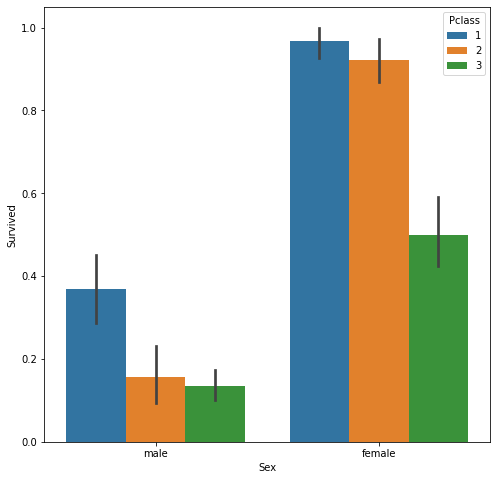

In [18]:
plt.figure(figsize=(8,8))
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=titanic)
plt.show()

**As we can see, More women survived than men.**

### stripplot
`stripplot()` is used when one of the variable under study is categorical. It represents the data in sorted order along any one of the axis.

In [19]:
plt.figure(figsize=(8,8))
sns.stripplot(x="Sex", y="Age", data=titanic)
plt.show()

To avoid the overlapping of the points, we can use the `jitter` to add some random noise to the data. This parameter will adjust the positions along the categorical axis. But Another option which can be used as an alternate to `‘Jitter’` is function `swarmplot()`.

### swarmplot
This function positions each point of scatter plot on the categorical axis and thereby avoids overlapping points:

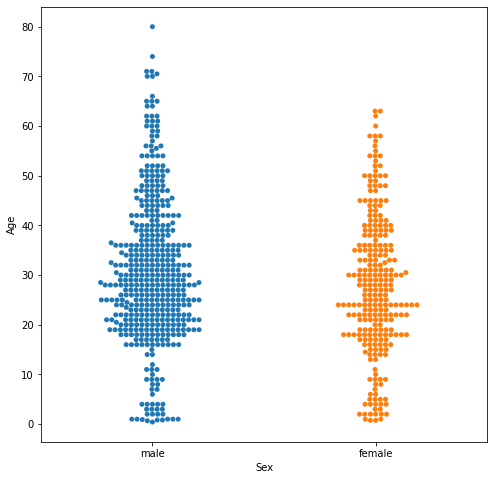

In [20]:
plt.figure(figsize=(8,8))
sns.swarmplot(x="Sex", y="Age", data=titanic)
plt.show()

**We can said that more passengers are approximally between 18 and 40 years old.**

### boxplot
**Boxplot** is a convenient way to visualize the distribution of data through their quartiles. Box plots usually have vertical lines extending from the boxes which are termed as **whiskers**. These whiskers indicate variability outside the upper and lower quartiles, hence Box Plots are also termed as **box-and-whisker plot** and **box-and-whisker diagram**. Any Outliers in the data are plotted as individual points.


In [21]:
plt.figure(figsize=(8,8))
sns.boxplot(x="Survived", y="Age", data=titanic)
plt.show()

**We have some outliers for passengers survery through their age.**

###  violinplot
**Violin Plots** are a combination of the **box plot** with the **kernel density estimates**. So, these plots are easier to analyze and understand the distribution of the data.

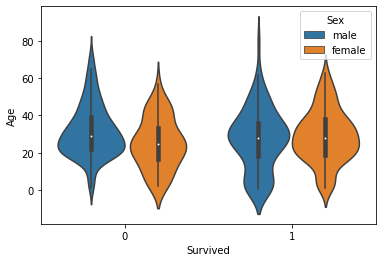

In [22]:
sns.violinplot(x="Survived", y="Age", hue='Sex', data=titanic)
plt.show()

### countplot
A special case in **barplot** is to show the no of observations in each category rather than computing a statistic for a second variable. For this, we use `countplot()`.


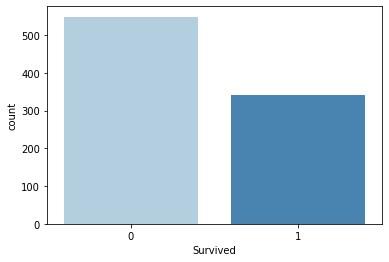

In [23]:
sns.countplot(x="Survived", data=titanic, palette="Blues");
plt.show()

### pointplot
**Point plots** serve same as **bar plots** but in a different style. Rather than the full bar, the value of the estimate is represented by the point at a certain height on the other axis.

In [24]:
plt.subplots(figsize=(8, 8))
sns.pointplot(x="Sex", y="Survived", hue="Pclass", data=titanic)
plt.show()

**We can see the average number of survivals of male and female in each class. From the plot we can understand that more number of females survived than males. In both males and females more number of survivals are from first
class.**


### Regression plots
Most of the times, we use datasets that contain multiple quantitative variables, and the goal of an analysis is often to relate those variables to each other. This can be done through the ***regression lines***.

While building the regression models, we often check for ***multicollinearity***, where we had to see the correlation between all the combinations of continuous variables and will take necessary action to remove multicollinearity if exists.

There are two main functions in Seaborn to visualize a linear relationship determined through regression. These functions are `regplot()` and `lmplot()`.

### lmplot
**lmplot** has data as a required parameter and the x and y variables must be specified as strings. This data form at is called ***“long -form ”*** data

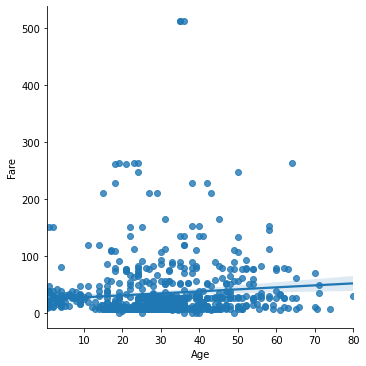

In [25]:
sns.lmplot(x="Age", y="Fare", data=titanic)
plt.show()


### regplot
**regplot** accepts the x and y variables in a variety of formats including simple numpy arrays, pandas Series objects, or as references to variables in a pandas DataFrame.

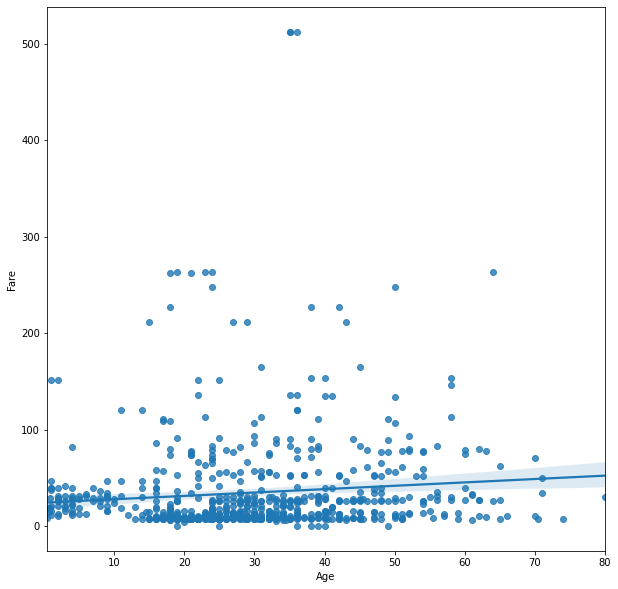

In [26]:
plt.subplots(figsize=(10, 10))
sns.regplot(x="Age", y="Fare", data=titanic)
plt.show()


###  heatmap

Visualizing data with **heatmaps** is a great way to do exploratory data analysis, when you have a data set with multiple variables. Heatmaps can reveal general pattern in the dataset, instantly. And it is very easy to make beautiful heatmaps with Seaborn library in Python.

Now let's plot the correlation matrix of our data with a heatmap.

<Axes: >

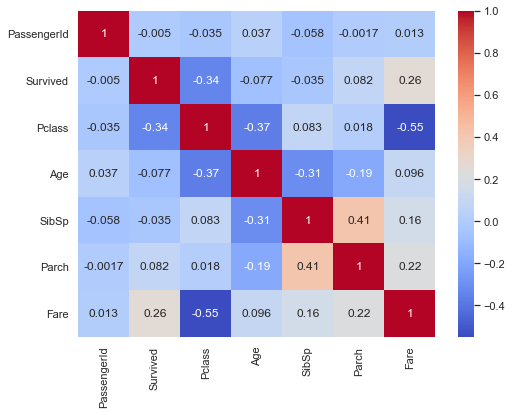

In [29]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.0)
sns.heatmap(titanic[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']].corr(), annot=True,cmap='coolwarm')

#### pairplot
To plot multiple pairwise bivariate distributions in a dataset, you can use the `pairplot()` function. This shows the relationship for **(n,2)** combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

<Figure size 576x576 with 0 Axes>

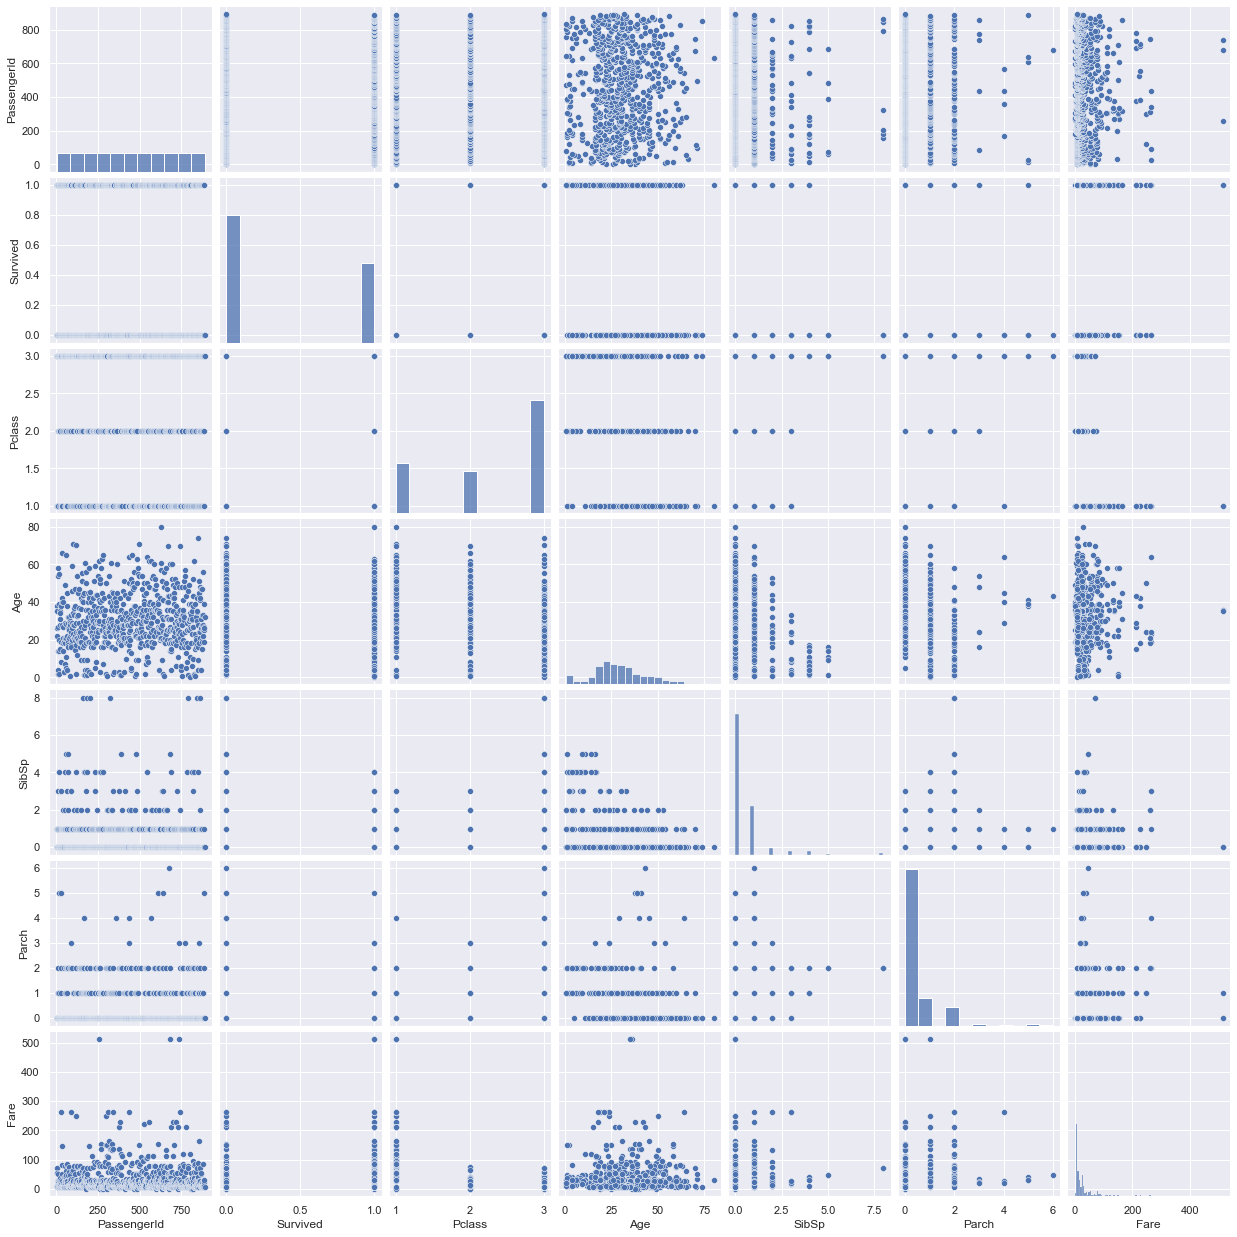

In [35]:
plt.figure(figsize=(8,8))
import seaborn as sns
sns.pairplot(titanic[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']])

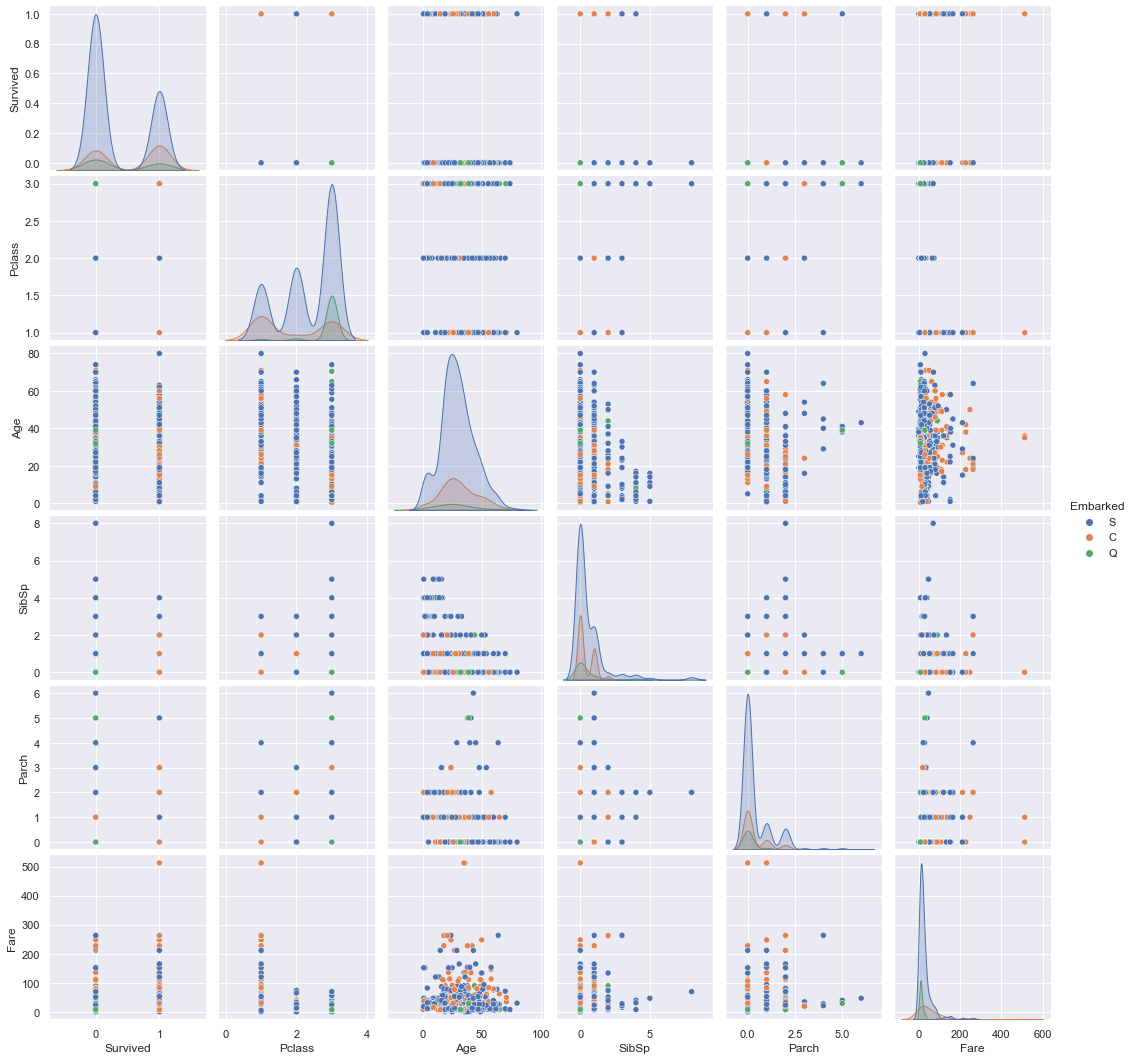

In [36]:
sns.pairplot(data=titanic.drop('PassengerId',axis=1),hue='Embarked')

#### jointplot
The best way to analyze **Bivariate Distribution** in seaborn is by using the `jointplot()` function. Jointplot creates a multi-panel figure that projects the bivariate relationship between two variables and also the univariate distribution of each variable on separate axes.

In [34]:
sns.jointplot(x='Age',y='Fare',data=titanic)
plt.show()